<a href="https://colab.research.google.com/github/Ebratul/Bioinformatics/blob/main/python/ML_Part_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Installing librarie**

In [3]:
!pip install chembl_webresource_client

  Using cached chembl_webresource_client-0.10.9-py3-none-any.whl.metadata (1.4 kB)
  Using cached requests_cache-1.2.1-py3-none-any.whl.metadata (9.9 kB)
  Using cached cattrs-25.1.1-py3-none-any.whl.metadata (8.4 kB)
  Using cached url_normalize-2.2.1-py3-none-any.whl.metadata (5.6 kB)
Using cached chembl_webresource_client-0.10.9-py3-none-any.whl (55 kB)
Using cached requests_cache-1.2.1-py3-none-any.whl (61 kB)
Using cached cattrs-25.1.1-py3-none-any.whl (69 kB)
Using cached url_normalize-2.2.1-py3-none-any.whl (14 kB)


**Importing libraries**

In [4]:
import pandas as pd
from chembl_webresource_client.new_client import new_client

Search For Target protin

Target search for coronavirus

In [5]:
#Target search for coronavirus
target=new_client.target

target_query=target.search('coronavirus')
# target_query=target.search('aromatase')//practice

targets=pd.DataFrame(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Coronavirus,Coronavirus,17.0,False,CHEMBL613732,[],ORGANISM,11119
1,[],Feline coronavirus,Feline coronavirus,14.0,False,CHEMBL612744,[],ORGANISM,12663
2,[],Murine coronavirus,Murine coronavirus,14.0,False,CHEMBL5209664,[],ORGANISM,694005
3,[],Canine coronavirus,Canine coronavirus,14.0,False,CHEMBL5291668,[],ORGANISM,11153
4,[],Human coronavirus 229E,Human coronavirus 229E,13.0,False,CHEMBL613837,[],ORGANISM,11137
5,[],Human coronavirus OC43,Human coronavirus OC43,13.0,False,CHEMBL5209665,[],ORGANISM,31631
6,[],Severe acute respiratory syndrome-related coro...,SARS coronavirus 3C-like proteinase,10.0,False,CHEMBL3927,"[{'accession': 'P0C6U8', 'component_descriptio...",SINGLE PROTEIN,694009
7,[],Middle East respiratory syndrome-related coron...,Middle East respiratory syndrome-related coron...,9.0,False,CHEMBL4296578,[],ORGANISM,1335626
8,[],Severe acute respiratory syndrome-related coro...,Replicase polyprotein 1ab,4.0,False,CHEMBL5118,"[{'accession': 'P0C6X7', 'component_descriptio...",SINGLE PROTEIN,694009
9,[],Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,4.0,False,CHEMBL4523582,"[{'accession': 'P0DTD1', 'component_descriptio...",SINGLE PROTEIN,2697049


**select and retrieve bioactivity data for SARS coronavirus 3C- like proteinase(Fourth entry)**

we will assign the seventh entry(which corresponds to the target protein,coronavirus 3C-like)to selected_target variable

In [6]:
selected_target=targets.target_chembl_id[6]
selected_target

'CHEMBL3927'

 Here,we will retrieve only bioactivity data for coronavirus 3C-like protinase(CHEMBL3927) that are reported as IC_50 values in nM(nanomolar) unit.

In [7]:
activity=new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")


In [8]:
df=pd.DataFrame(res)


In [9]:
pd.set_option('display.max_rows', None)
df["molecule_chembl_id"].head(3)

,molecule_chembl_id
0,CHEMBL187579
1,CHEMBL188487
2,CHEMBL185698


check  **standard_type** = 'IC50'

In [10]:
df.standard_type.unique()

array(['IC50'], dtype=object)

Finally we will save the resulting bioactivity data to a CSV file bioactivity_data.csv

In [11]:
df = df.to_csv('bioactivity_data.csv',index=False)

**Copying files to Google Drive**

firstly,we need to mount the Google Drive into  Colab so that we can have access to our Google adrive from within Colab.

In [12]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Next,we create a data folder in our **Colab Notebools** folder on Google Drive.

In [13]:
! ls "/content/drive/My Drive/Classroom"

'Communication Engineering CSE; CSE 365, CSE 366'
 CSE241
'Data Science'
'Numerical Analysis'
 OS_2021_Batch
'Principles of Economics (ECO105D (CSE)) Second Year Second Semester (2021-22)'
'Software Engineering and Design Patten Theory'


In [14]:
! mkdir "/content/drive/My Drive/Colab/data"

mkdir: cannot create directory ‘/content/drive/My Drive/Colab/data’: File exists


In [15]:
! cp bioactivity_data.csv "/content/drive/My Drive/Colab/data"

In [16]:
! ls "/content/drive/My Drive/Colab/data"

bioactivity_data.csv  bioactivity_preprocessed_data.csv


In [17]:
! ls -l "/content/drive/My Drive/Colab/data"

total 157
-rw------- 1 root root 138803 Jul  6 17:27 bioactivity_data.csv
-rw------- 1 root root  20699 Jul  6 10:24 bioactivity_preprocessed_data.csv


Let's see the CSV files that have so far.

In [18]:
! ls

bioactivity_data.csv		   condacolab_install.log  sample_data
bioactivity_preprocessed_data.csv  drive


Taking a glimpase of the **bioactivity_data**.csv file that we've just created.

In [19]:
! head bioactivity_data.csv

action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
,,1480935,[],CHEMBL829584,In vitro inhibitory concentration against SARS coronavirus main protease (SARS CoV 3C-like protease),B,,,BAO_0000190,BAO_0000357,single protein format,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,,,CHEMBL1139624,Bioorg Med Chem Lett,2005,"{'bei': '18.28', 'le': '0.33', 'lle': '3.25', 'sei'

**Handling missing data**

In [20]:
df = pd.read_csv("bioactivity_data.csv")

notna() return true if data exist otherwise false

In [21]:
print(df.columns)

Index(['action_type', 'activity_comment', 'activity_id', 'activity_properties',
       'assay_chembl_id', 'assay_description', 'assay_type',
       'assay_variant_accession', 'assay_variant_mutation', 'bao_endpoint',
       'bao_format', 'bao_label', 'canonical_smiles', 'data_validity_comment',
       'data_validity_description', 'document_chembl_id', 'document_journal',
       'document_year', 'ligand_efficiency', 'molecule_chembl_id',
       'molecule_pref_name', 'parent_molecule_chembl_id', 'pchembl_value',
       'potential_duplicate', 'qudt_units', 'record_id', 'relation', 'src_id',
       'standard_flag', 'standard_relation', 'standard_text_value',
       'standard_type', 'standard_units', 'standard_upper_value',
       'standard_value', 'target_chembl_id', 'target_organism',
       'target_pref_name', 'target_tax_id', 'text_value', 'toid', 'type',
       'units', 'uo_units', 'upper_value', 'value'],
      dtype='object')


In [22]:
df.standard_value.notna()

,standard_value
0,True
1,True
2,True
3,True
4,True
5,True
6,True
7,True
8,True
9,True


if any compounds has missing value for the standard_value column then drop it

In [23]:
df2=df[df.standard_value.notna()]
df2.drop(columns= "action_type",inplace = True)
df2.head(3)

/tmp/ipython-input-23-2757599530.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(columns= "action_type",inplace = True)


,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,NaN,1480935,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,NaN,NaN,BAO_0000190,BAO_0000357,...,Severe acute respiratory syndrome-related coro...,SARS coronavirus 3C-like proteinase,694009,NaN,NaN,IC50,uM,UO_0000065,NaN,7.2
1,NaN,1480936,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,NaN,NaN,BAO_0000190,BAO_0000357,...,Severe acute respiratory syndrome-related coro...,SARS coronavirus 3C-like proteinase,694009,NaN,NaN,IC50,uM,UO_0000065,NaN,9.4
2,NaN,1481061,[],CHEMBL830868,In vitro inhibitory concentration against SARS...,B,NaN,NaN,BAO_0000190,BAO_0000357,...,Severe acute respiratory syndrome-related coro...,SARS coronavirus 3C-like proteinase,694009,NaN,NaN,IC50,uM,UO_0000065,NaN,13.5


Apparently, for this dataset there is no missing data. But we can use the above code cell for bioactivity data of other target protein.

**Data pre-processing of the bioactivity data**

**Lebeling compound as either being active, inactive or intermediate**

the bioactivity data is in the IC50 unit.Compounds having values of less the 1000nM will be considered to be active while those greater then 10000 nM will be considered to be inactive.As for those value in between 1000, and 10000 nM will be referred to as intermediate.

In [24]:
print(df["standard_value"].dtypes)

float64


In [25]:
bioactivity_class=[]
for i in df2.standard_value:
  if float(i)>=10000:
    bioactivity_class.append("inactive")
  elif float(i)<=1000:
    bioactivity_class.append("active")
  else:
    bioactivity_class.append("intermediate")

**Iterate the molecule_chembl_id to a list**

In [26]:
df2.molecule_chembl_id.head(3)

,molecule_chembl_id
0,CHEMBL187579
1,CHEMBL188487
2,CHEMBL185698


In [27]:
mol_cid=[]
for i in df2.molecule_chembl_id:
  mol_cid.append(i)

In [ ]:
#  mol_cid

**Iterate canonical_smiles to a list**

In [54]:
canonical_smiles=[]
for i in df2.canonical_smiles:
  canonical_smiles.append(i)
# canonical_smiles

Iterate standard_value to a list

In [29]:
standard_value=[]
for i in df2.standard_value:
  standard_value.append(i)

In [50]:
# standard_value

**Alternative method**

In [30]:
df2['bioactivity_class'] = bioactivity_class
selection=['molecule_chembl_id','canonical_smiles','bioactivity_class','standard_value']
df3=df2[selection]
df3.head(3)

/tmp/ipython-input-30-3717989745.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bioactivity_class'] = bioactivity_class


,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,7200.0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,9400.0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,13500.0


In [31]:
df4 = pd.concat([df3,pd.Series(bioactivity_class)],axis=1)

In [32]:
df4.head(3)

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value,0
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,7200.0,intermediate
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,9400.0,intermediate
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,13500.0,inactive


**Combine the 4 lists into a dataframe**

In [33]:
data_tuples=list(zip(mol_cid,canonical_smiles,bioactivity_class,standard_value))
df3=pd.DataFrame(data_tuples,columns=['molecule_chembl_id','canonical_smiles','bioactivity_class','standard_value'])

In [34]:
df3

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,7200.00
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,9400.00
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,13500.00
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,13110.00
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,2000.00
5,CHEMBL365134,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c(Br)cccc21,active,980.00
6,CHEMBL187598,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccc(F)cc21,intermediate,4820.00
7,CHEMBL190743,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccc(I)cc21,active,950.00
8,CHEMBL365469,O=C1C(=O)N(Cc2cc3ccccc3s2)c2cccc(Cl)c21,inactive,11200.00
9,CHEMBL188983,O=C1C(=O)N(C/C=C/c2cc3ccccc3s2)c2ccc(I)cc21,inactive,23500.00


In [35]:
df3.to_csv('bioactivity_preprocessed_data.csv',index=False)

In [36]:
! ls -l

total 192
-rw-r--r-- 1 root root 138803 Jul  6 17:26 bioactivity_data.csv
-rw-r--r-- 1 root root  20699 Jul  6 17:28 bioactivity_preprocessed_data.csv
-rw-r--r-- 1 root root  21477 Jul  6 17:23 condacolab_install.log
drwx------ 5 root root   4096 Jul  6 17:27 drive
drwxr-xr-x 1 root root   4096 Jul  1 21:04 sample_data


Let's copy the Google Drive

In [37]:
! cp bioactivity_preprocessed_data.csv "/content/drive/My Drive/Colab/data"

In [38]:
! ls "/content/drive/My Drive/Colab/data"

bioactivity_data.csv  bioactivity_preprocessed_data.csv


In [39]:
import sys
sys.path.append('/content/drive/My Drive/Colab/data')

In [40]:
# Install RDKit in Google Colab
!pip install rdkit-pypi


In [41]:
# Install conda in Google Colab
!pip install -q condacolab
import condacolab
condacolab.install()


✨🍰✨ Everything looks OK!


In [42]:
import pandas as pd


In [43]:
df = pd.read_csv('bioactivity_preprocessed_data.csv')

.Molecular weight < 500 Dalton

. Octanot-water partition corffieciet(LogP)<5(lipophilicity)

.Hydrogen bond donors < 5

.Hydrogen bond acceptors < 10

**Calculate Lipinski descriptor**

In [44]:
!pip install numpy<2

/bin/bash: line 1: 2: No such file or directory


In [46]:
from pickle import REDUCE
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors,Lipinski

.SMILES (Simplified Molecular Input Line Entry System)

In [62]:
def lipinski(smiles, verbose = False):
  moldata = []

  for elem in smiles:
    mol = Chem.MolFromSmiles(elem)
    moldata.append(mol)
  baseData = []
  i = 0
  for mol in moldata:
    desc_MolWt = Descriptors.MolWt(mol)
    desc_MolLogP = Descriptors.MolLogP(mol)
    desc_NumHDonors = Lipinski.NumHDonors(mol)
    desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

    row = np.array([desc_MolWt,
                    desc_MolLogP,
                    desc_NumHDonors,
                    desc_NumHAcceptors])
    if(i == 0):
      baseData.append(row)
    else:
      baseData.append(row)
    i = i + 1

  columnNames = ["MW","LogP","NumHDonors","NumHAcceptors"]
  descriptors = pd.DataFrame(data = baseData, columns = columnNames)

  return descriptors

In [63]:
df_lipinski = lipinski(df.canonical_smiles)

In [64]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,281.271,1.89262,0.0,5.0
1,415.589,3.81320,0.0,2.0
2,421.190,2.66050,0.0,4.0
3,293.347,3.63080,0.0,3.0
4,338.344,3.53900,0.0,5.0
5,372.243,4.39330,0.0,3.0
6,311.337,3.76990,0.0,3.0
7,419.243,4.23540,0.0,3.0
8,327.792,4.28420,0.0,3.0
9,445.281,4.74860,0.0,3.0


In [66]:
df.head(3)

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,7200.0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,9400.0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,13500.0


In [90]:
df_combine = pd.concat([df,df_lipinski],axis=1)
df_combine.head(5)

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,7200.0,281.271,1.89262,0.0,5.0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,9400.0,415.589,3.81320,0.0,2.0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,13500.0,421.190,2.66050,0.0,4.0
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,13110.0,293.347,3.63080,0.0,3.0
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,2000.0,338.344,3.53900,0.0,5.0


convert IC50 to PIC50

In [136]:
import numpy as np

def pIC50(input):
  pIC50 = []

  for i in input['standard_value_norm']:
    molar = i * (10 ** -9)  # convert nM to M
    pIC50.append(-np.log10(molar))

  input['pIC50'] = pIC50
  # x = input.drop('standard_value', axis=1)  # fixed here
  return input

In [113]:
df_combine['standard_value'].describe()

,standard_value
count,2.450000e+02
mean,6.893878e+04
std,1.851962e+05
min,5.000000e+01
25%,5.000000e+03
50%,1.500000e+04
75%,4.700000e+04
max,2.000000e+06


In [112]:
df_combine['standard_value'].max()

2000000.0

In [98]:
df_combine.head(3)

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,7200.0,281.271,1.89262,0.0,5.0,7200.0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,9400.0,415.589,3.81320,0.0,2.0,9400.0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,13500.0,421.190,2.66050,0.0,4.0,13500.0


In [81]:
-np.log10((10**-9)* 100000000)

np.float64(1.0)

In [82]:
-np.log10((10**-9)* 10000000000)

np.float64(-1.0)

In [134]:
def norm_value(input):
  norm = []
  for i in input['standard_value']:
    if i > 100000000:
      i = 100000000
    norm.append(i)
  input['standard_value_norm'] = norm
  x = input.drop('standard_value', axis=1)

  return x

In [135]:
df_norm = norm_value(df_combine)
df_norm.head(4)

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,281.271,1.89262,0.0,5.0,7200.0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,415.589,3.81320,0.0,2.0,9400.0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,421.190,2.66050,0.0,4.0,13500.0
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,293.347,3.63080,0.0,3.0,13110.0


In [115]:
df_norm.standard_value_norm.describe()

,standard_value_norm
count,2.450000e+02
mean,6.893878e+04
std,1.851962e+05
min,5.000000e+01
25%,5.000000e+03
50%,1.500000e+04
75%,4.700000e+04
max,2.000000e+06


In [139]:
df_final = pIC50(df_norm)
df_final.head(5)

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm,pIC50
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,281.271,1.89262,0.0,5.0,7200.0,5.142668
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,415.589,3.81320,0.0,2.0,9400.0,5.026872
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,421.190,2.66050,0.0,4.0,13500.0,4.869666
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,293.347,3.63080,0.0,3.0,13110.0,4.882397
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,338.344,3.53900,0.0,5.0,2000.0,5.698970


In [140]:
df_final.pIC50.describe()

,pIC50
count,245.000000
mean,4.894585
std,0.911338
min,2.698970
25%,4.327902
50%,4.823909
75%,5.301030
max,7.301030


**Removing the intermediate bioactivity class**

In [142]:
df_2class = df_final[df_final['bioactivity_class'] != 'intermediate']
df_2class.head(5)

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm,pIC50
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,421.190,2.6605,0.0,4.0,13500.0,4.869666
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,293.347,3.6308,0.0,3.0,13110.0,4.882397
5,CHEMBL365134,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c(Br)cccc21,active,372.243,4.3933,0.0,3.0,980.0,6.008774
7,CHEMBL190743,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccc(I)cc21,active,419.243,4.2354,0.0,3.0,950.0,6.022276
8,CHEMBL365469,O=C1C(=O)N(Cc2cc3ccccc3s2)c2cccc(Cl)c21,inactive,327.792,4.2842,0.0,3.0,11200.0,4.950782


 # bold text Exploratory Data Analysis via Lipinski descriptors

In [143]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

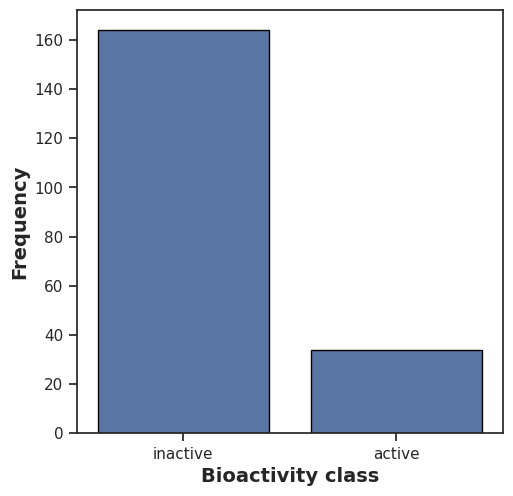

In [145]:
plt.figure(figsize=(5.5,5.5))
sns.countplot(x='bioactivity_class', data = df_2class, edgecolor='black')
plt.xlabel('Bioactivity class', fontsize = 14, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 14, fontweight = 'bold')
plt.show()

save this grap


In [146]:
plt.savefig('plot_bioactivity_class.pdf')

<Figure size 640x480 with 0 Axes>

# Scatter plot of MW vs LogP

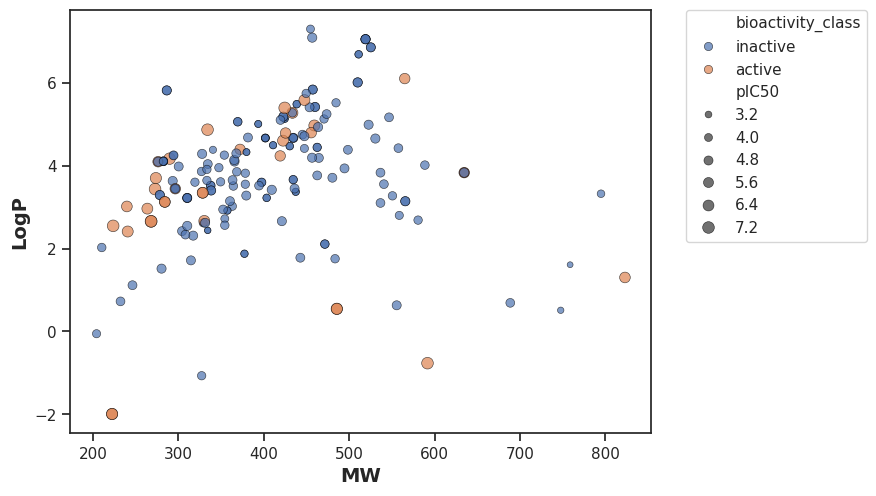

In [160]:
plt.figure(figsize=(7.5, 5.5))
sns.scatterplot(x='MW', y = 'LogP', data = df_2class, hue = 'bioactivity_class', size = 'pIC50', edgecolor = 'black', alpha = 0.7)
plt.xlabel('MW',fontsize = 14, fontweight = 'bold')
plt.ylabel('LogP',fontsize = 14, fontweight = 'bold')
plt.legend(bbox_to_anchor=(1.06, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')
plt.show()

# boxplot

**pIC50 value**

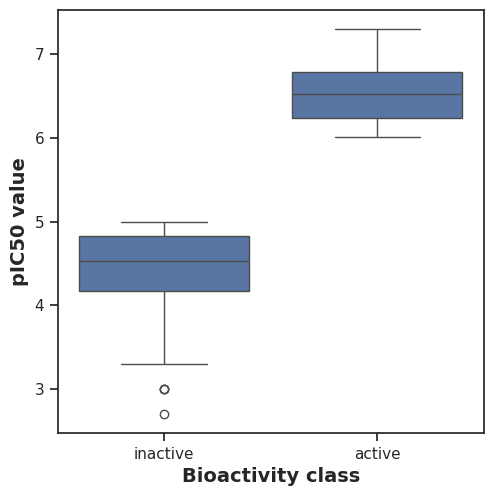

In [161]:
plt.figure (figsize=(5.5, 5.5))
sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_2class)
plt.xlabel('Bioactivity class', fontsize = 14, fontweight = 'bold')
plt.ylabel('pIC50 value', fontsize = 14, fontweight = 'bold')
plt.savefig('plot_ic50.pdf')
plt.show()

# Mann-Whitney U Test ( Wilcoxon rank-sum test)

In [189]:
# selection = [df_final, 'bioactivity_class']
# # print(selection)
# df = df_2class[selection]
# df_final.head(3)

In [190]:
def manwhitney(descriptors, verbose=False):
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

  seed(1)

  selection = [descriptors, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptors]

  selection = [descriptors, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptors]

  stat, p = mannwhitneyu(active, inactive)

  alpha = 0.05
  if p > alpha:
    Interpretation = 'Same distribution (fail to reject H0)'
  else:
    Interpretation = 'Different distribution (reject H0)'

  result = pd.DataFrame({'Descriptor':descriptors,
                         'Statistics':stat,
                         'p':p,
                         'alpha':alpha,
                         'Interpretation':Interpretation},
                       index = [0])
  filename = 'manwhitneyu_' + descriptors + '.csv'
  result.to_csv(filename)

  return result




In [191]:
manwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,5576.0,4.760913e-20,0.05,Different distribution (reject H0)


# MW

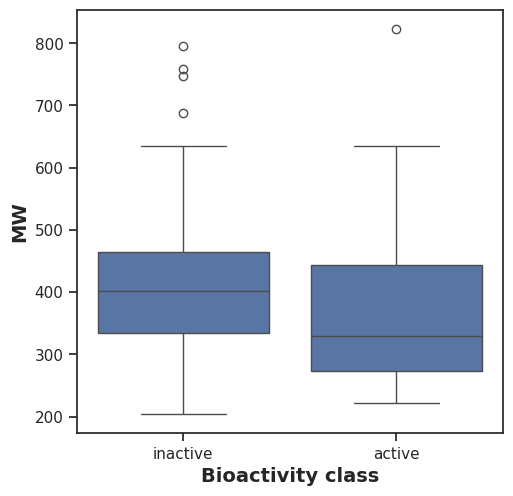

In [192]:
plt.figure(figsize=(5.5,5.5))
sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize = 14, fontweight = 'bold')
plt.ylabel('MW', fontsize = 14, fontweight = 'bold')
plt.savefig('plot_MW.pdf')
plt.show()

In [193]:
manwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,1996.5,0.009286,0.05,Different distribution (reject H0)
